In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('/kaggle/input/hr-analytics-case-study/hranalytics/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Employee Attrition Analysis

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print("The number of missing values in the dataset is",df.isna().sum().sum())
print("The number of duplicate rows in the dataset is",df.duplicated().sum())

The number of missing values in the dataset is 0
The number of duplicate rows in the dataset is 0


In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Summary Statistics

In [6]:
df.describe().transpose()[['mean', 'min', 'max']]

,mean,min,max
Age,36.923810,18.0,60.0
DailyRate,802.485714,102.0,1499.0
DistanceFromHome,9.192517,1.0,29.0
Education,2.912925,1.0,5.0
EmployeeCount,1.000000,1.0,1.0
EmployeeNumber,1024.865306,1.0,2068.0
EnvironmentSatisfaction,2.721769,1.0,4.0
HourlyRate,65.891156,30.0,100.0
JobInvolvement,2.729932,1.0,4.0
JobLevel,2.063946,1.0,5.0


### Employees by Department
R&D and Sales departments make up ~95% of all employees

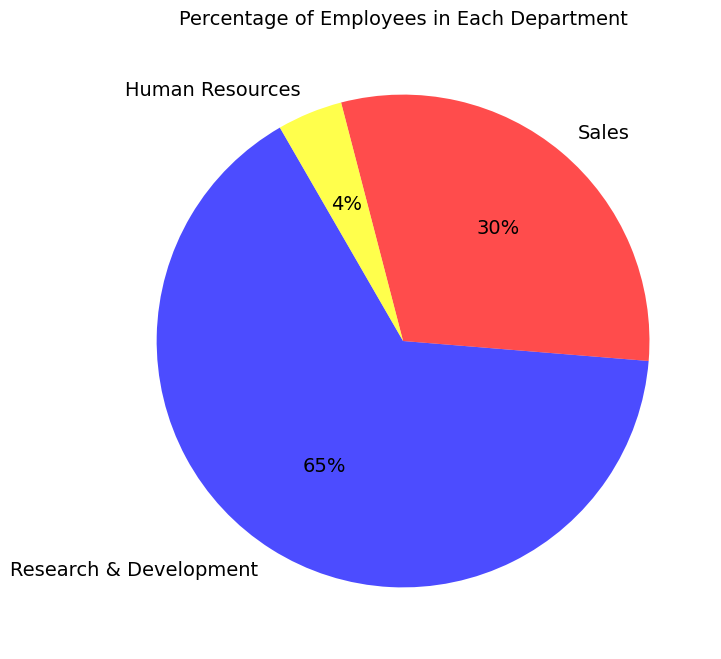

In [7]:
# Custom colors and alpha values
colors = [(0, 0, 1, 0.7), (1, 0, 0, 0.7), (1, 1, 0, 0.7)]  # Blue, Red, Yellow with alpha

department_counts = df['Department'].value_counts()

# Create a pie chart with custom colors and alpha
plt.figure(figsize=(10,8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.0f%%',
        startangle=120, textprops={'fontsize': 14}, colors=colors)
plt.title("Percentage of Employees in Each Department", size=14)

# Show the plot
plt.show()


### Frequency Distribution
The histograms presented here illustrate the distribution of various data variables. They reveal a common pattern across these variables, characterized by a positively skewed distribution, where the majority of data points cluster towards lower values, and there are relatively few outliers with exceptionally high values. This skewness implies that there are only a few individuals with extensive experience, longer tenures, or higher incomes compared to the larger group of individuals. This information is crucial for understanding the data's characteristics and potential implications for analysis and decision-making.

In [8]:
def plot_histogram_with_mean(df, column_name, bins=10, alpha=0.7, color='red', edgecolor='black'):

    # Extract the column data
    data = df[column_name]
    
    # Calculate the mean of the data
    mean_value = np.mean(data)
    
    # Create the histogram
    plt.hist(data, bins=bins, alpha=alpha, color=color, edgecolor=edgecolor)
    
    # Add a vertical line at the mean
    plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean = {mean_value:.2f}')
    
    # Label the axes and add a legend
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(False)
    
    # Show the plot
    plt.title(f'Histogram of {column_name}')
    plt.show()

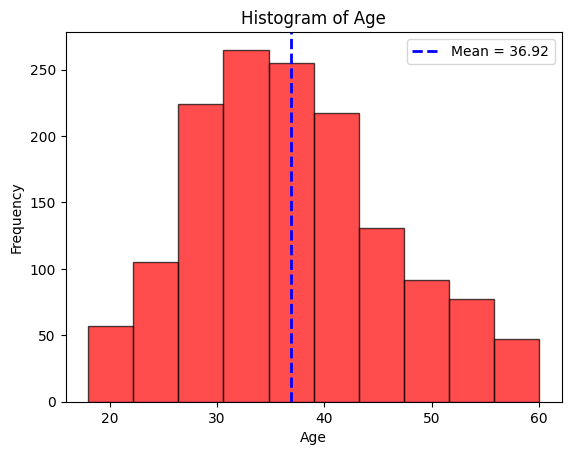

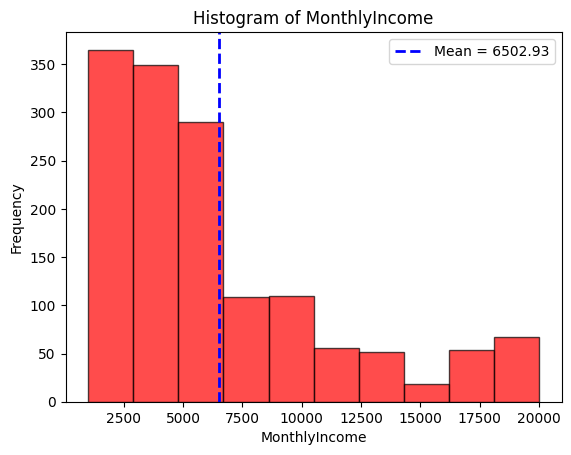

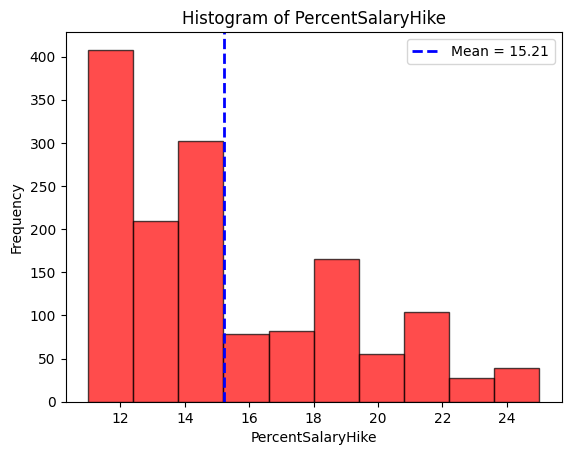

In [9]:
plot_histogram_with_mean(df, 'Age')
plot_histogram_with_mean(df, 'MonthlyIncome')
plot_histogram_with_mean(df, 'PercentSalaryHike')

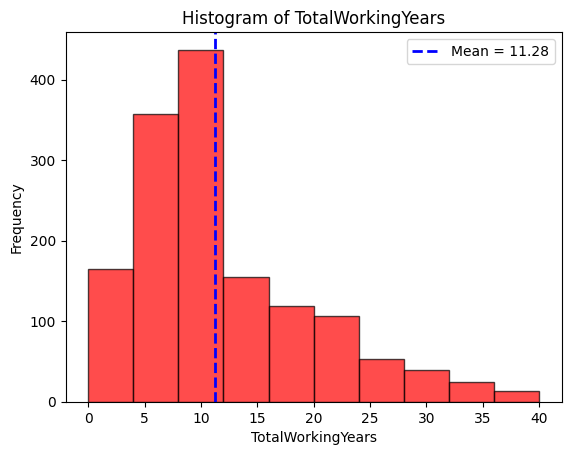

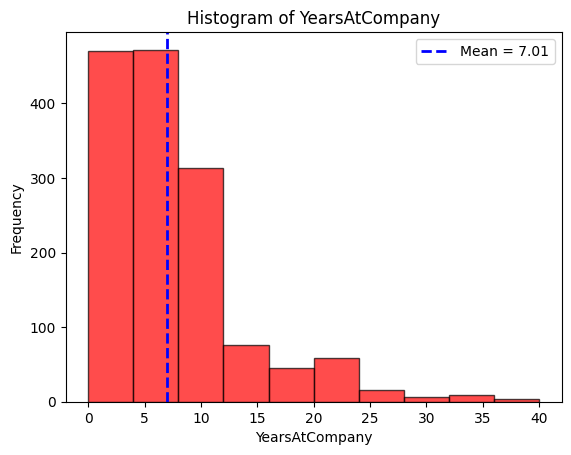

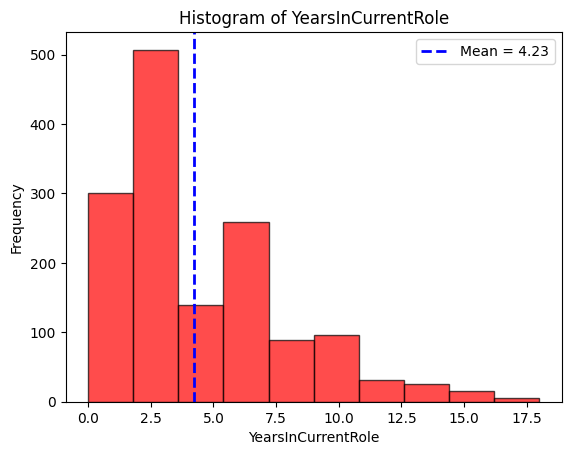

In [10]:
plot_histogram_with_mean(df, 'TotalWorkingYears')
plot_histogram_with_mean(df, 'YearsAtCompany')
plot_histogram_with_mean(df, 'YearsInCurrentRole')

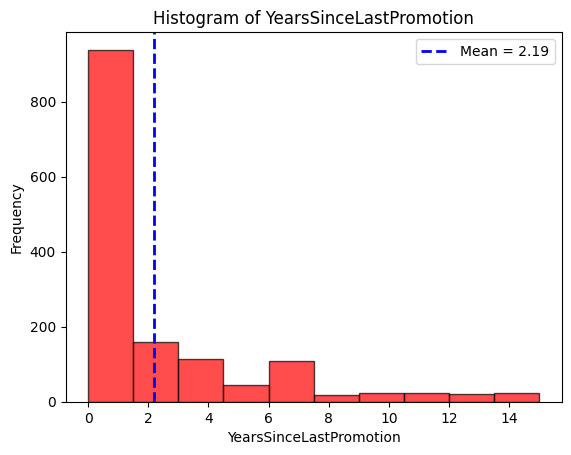

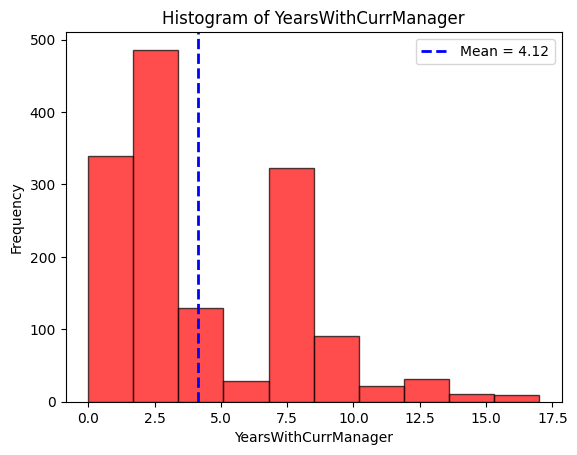

In [11]:
plot_histogram_with_mean(df, 'YearsSinceLastPromotion')
plot_histogram_with_mean(df, 'YearsWithCurrManager')

In [12]:
def plot_attrition_percentage(df, group_column, title):
    # Group by the specified column for attrition
    attrition_group = df.groupby([group_column, 'Attrition']).size().unstack()
    attrition_percentage = (attrition_group['Yes'] / attrition_group.sum(axis=1) * 100).reset_index()

    # Create a stacked bar chart with percentage labels
    plt.figure(figsize=(8, 6))
    plt.bar(attrition_percentage[group_column], attrition_percentage[0], 
            color='red', alpha=0.7, label='Attrition (Yes)')
    plt.bar(attrition_percentage[group_column], 100 - attrition_percentage[0], 
            bottom=attrition_percentage[0], color='blue', alpha=0.7, label='No Attrition (No)')

    # Annotate the bars with percentage values
    for x, y in zip(attrition_percentage[group_column], attrition_percentage[0]):
        plt.text(x, y / 2, f'{y:.0f}%', ha='center', va='center', fontsize=12, color='black')

    plt.title(f"Attrition Percentage By {group_column}", size=14)
    plt.ylabel("Percentage", size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)


    # Show the plot
    plt.show()

### Attrition Along Different Dimensions 
Based on charts below, %attrition is high in <br>
- Sales department <br>
- Single employees <br>
- Employees that work ovetime <br>
- Employees that travel frequently for businss <br>

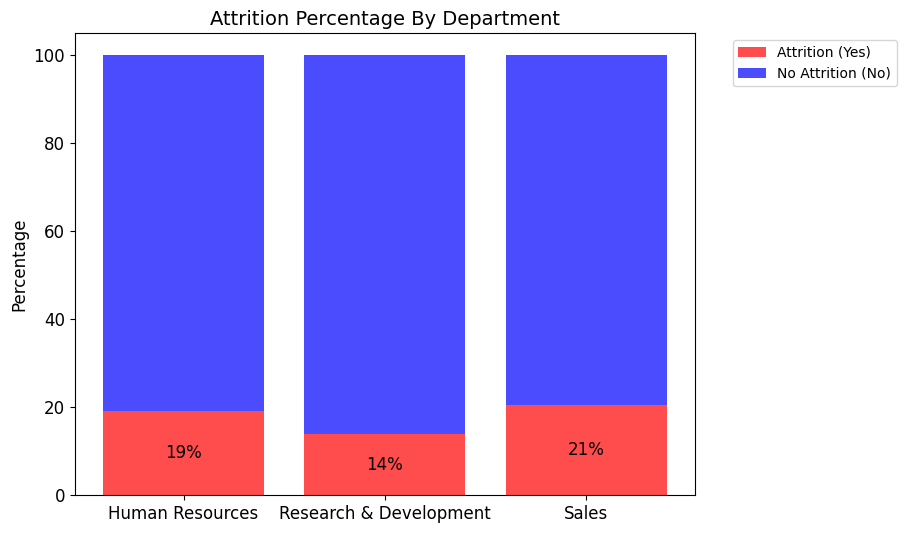

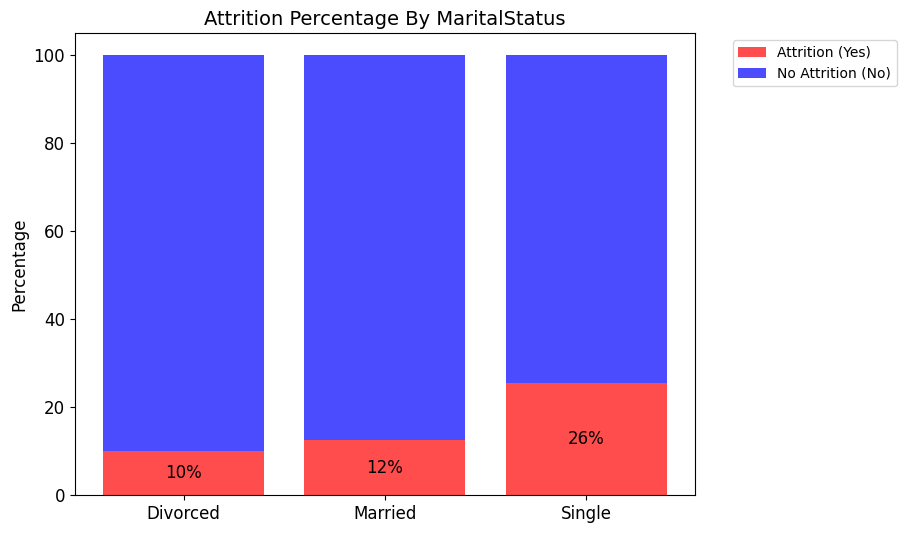

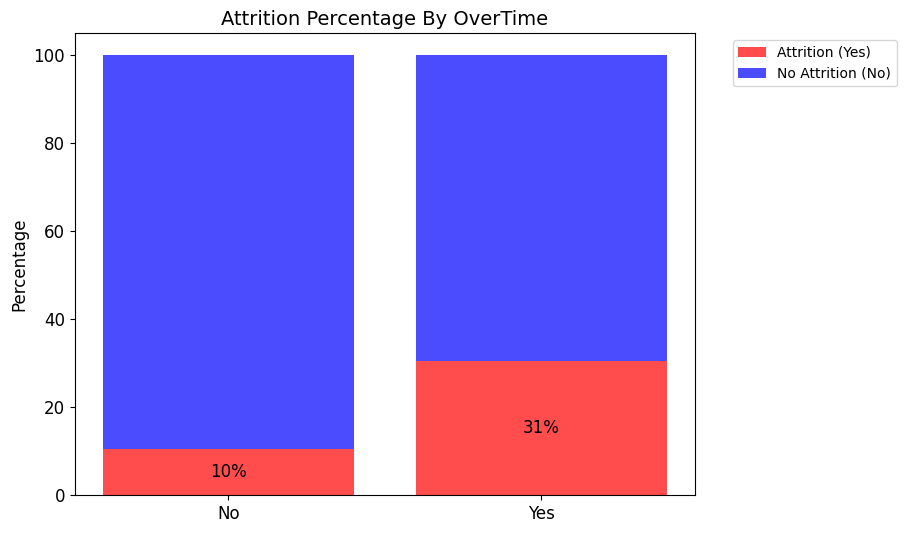

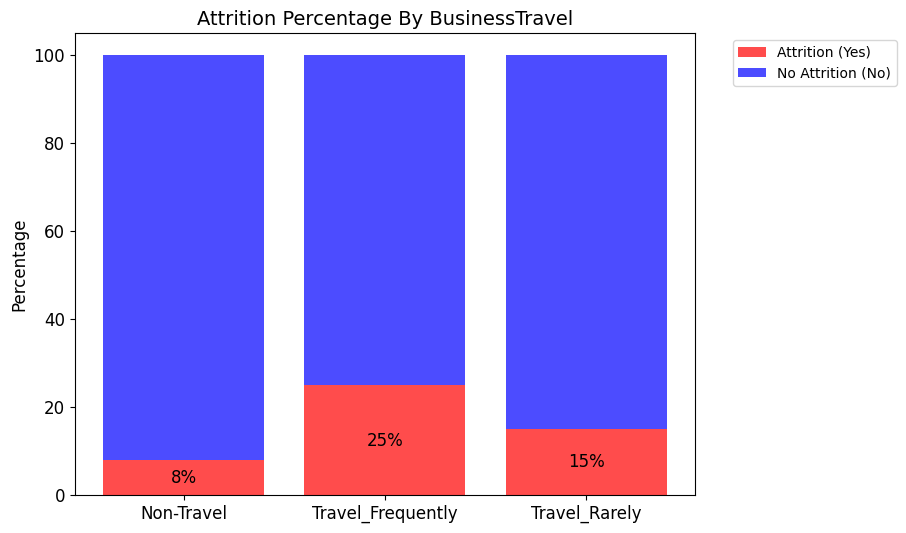

In [13]:
plot_attrition_percentage(df, 'Department', "Attrition Percentage By Department")
plot_attrition_percentage(df, 'MaritalStatus', "Attrition Percentage By Marital Status")
plot_attrition_percentage(df, 'OverTime', "Attrition Percentage By OverTime")
plot_attrition_percentage(df, 'BusinessTravel', "Attrition Percentage By BusinessTravel")


### Department Attrition by Job Role
% Attrition is higher among junior employees in all three departments

/tmp/ipykernel_20/3066720102.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(job_roles, rotation=90, fontsize=12)
/tmp/ipykernel_20/3066720102.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(job_roles, rotation=90, fontsize=12)
/tmp/ipykernel_20/3066720102.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(job_roles, rotation=90, fontsize=12)


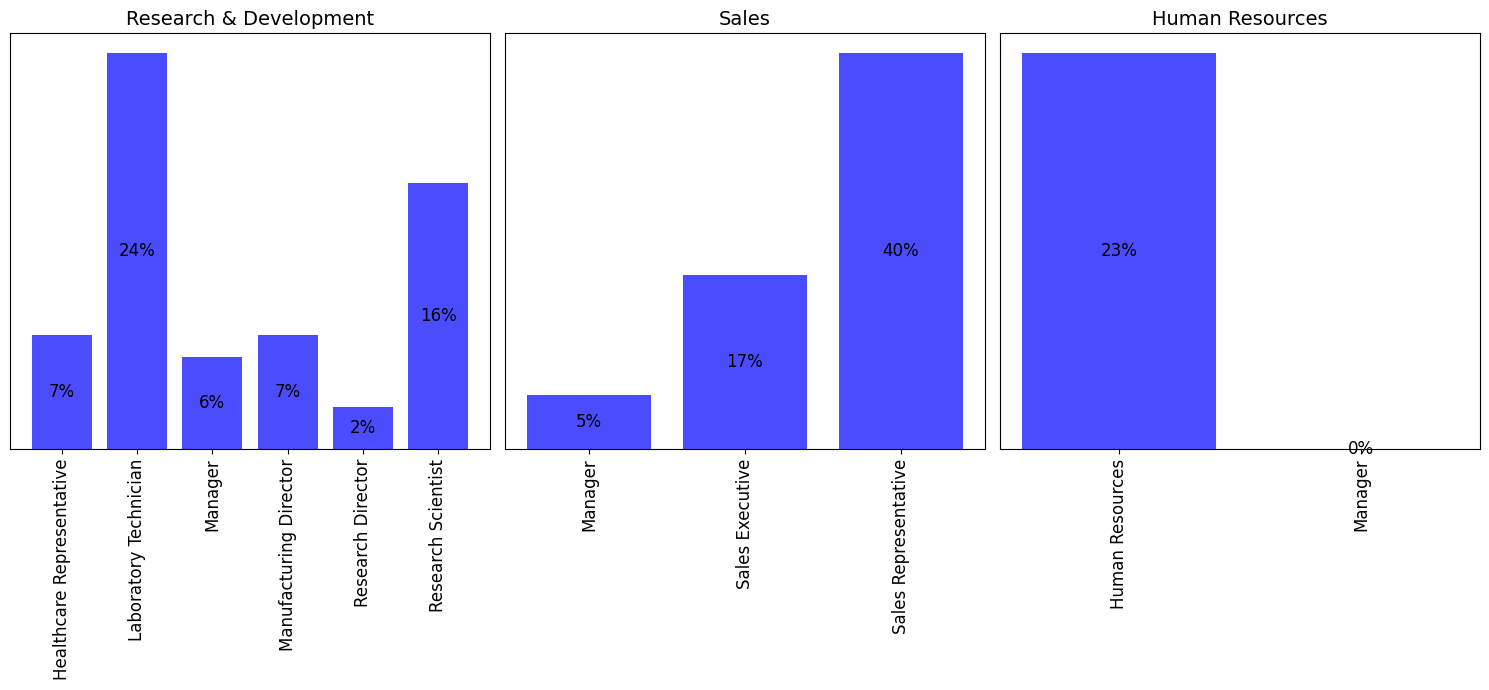

In [14]:
# Get unique department types from the DataFrame and sort them by count (attrition percentage)
department_counts = df['Department'].value_counts().sort_values(ascending=False)
department_types = department_counts.index

# Create a figure with multiple subplots in one line
fig, axes = plt.subplots(1, len(department_types), figsize=(15, 7))

# Loop through each department type
for i, department in enumerate(department_types):
    # Filter the data for the current department
    attrition_department = df[df['Department'] == department]
    attrition_by_jobrole = attrition_department.groupby(['JobRole', 'Attrition']).size().unstack().fillna(0)
    attrition_by_jobrole_percentage = (attrition_by_jobrole['Yes'] / attrition_by_jobrole.sum(axis=1) * 100).reset_index()

    # Get job roles and percentages for the current department
    job_roles = attrition_by_jobrole_percentage['JobRole']
    percentages = attrition_by_jobrole_percentage[0]

    # Create a stacked bar chart with percentage labels for the current department
    ax = axes[i]
    ax.bar(job_roles, percentages, alpha=0.7, color='blue')

    # Annotate the bars with percentage values
    for x, y in zip(job_roles, percentages):
        ax.text(x, y / 2, f'{y:.0f}%', ha='center', va='center', fontsize=12, color='black')

    # Remove y-axis labels
    ax.set_yticks([])
    
    # Set x-axis labels
    ax.set_xticklabels(job_roles, rotation=90, fontsize=12)

    # Set the title for each subplot as the department type
    ax.set_title(department, size=14)
    
    ax.grid(False)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




In [15]:
cols_to_drop = {'DailyRate','EmployeeCount', 'EmployeeNumber', 'StandardHours'}
df.drop(columns = cols_to_drop, inplace = True)

## Hypothesis Testing
By analyzing data related to age, income, and other variables, we aim to determine which factors are closely linked to employee retention. The code provided offers an automated way to investigate these relationships with a 95% confidence level. This level of confidence ensures that our findings are dependable and relevant for making informed decisions about employee retention strategies.

In [16]:
def assess_impact_on_attrition(df, column_name, significance_level=0.05):
    """
    Assess the impact of a column on attrition using a t-test.
    Parameters:
    - df: DataFrame containing the data.
    - column_name: Name of the column to assess.
    - significance_level: Significance level for the t-test (default is 0.05).
    Returns:
    - A message indicating whether the column impacts attrition at the specified significance level.
    """
    # Separate data into two groups based on Attrition
    attrition_yes = df[df['Attrition'] == 'Yes'][column_name]
    attrition_no = df[df['Attrition'] == 'No'][column_name]
    
    # Perform a two-sample t-test
    t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no, equal_var=False)
    
    # Check if the p-value is less than the significance level
    if p_value < significance_level:
        impact_message = f"The '{column_name}' impacts attrition at a significance level of {significance_level}."
    else:
        impact_message = f"The '{column_name}' does not have a significant impact on attrition at a significance level of {significance_level}."
    
    return impact_message



def check_impact_of_all_columns(df, significance_level=0.05):
    """
    Check the impact of all numeric columns on attrition using a t-test and print the results.

    Parameters:
    - df: DataFrame containing the data.
    - significance_level: Significance level for the t-test (default is 0.05).
    """
    impacting_columns = []
    
    for column_name in df.select_dtypes(include=np.number).columns:
        impact_message = assess_impact_on_attrition(df, column_name, significance_level)
        if "impacts attrition" in impact_message.lower():
            impacting_columns.append(column_name)
    
    if len(impacting_columns) > 0:
        print(f"Following factors impact attrition at {significance_level*100}% significance level:")
        for column in impacting_columns:
            print(column)
    else:
        print(f"No factors impact attrition at {significance_level*100}% significance level.")

        
#Call function        
check_impact_of_all_columns(df)


Following factors impact attrition at 5.0% significance level:
Age
DistanceFromHome
EnvironmentSatisfaction
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsWithCurrManager


#### Key Insights from Box Plots Below: 
- Employees who left tend to have a lower median age, indicating a younger workforce <br>
- Those who left typically lived farther from the office, possibly seeking shorter commutes <br>
- The median income of departing employees was lower than that of those who stayed <br>
- Departing employees generally had fewer total working years <br>
- Despite leaving, they had longer median tenures and fewer years in their current roles <br>
- The median duration with their current manager was also shorter among departing employees

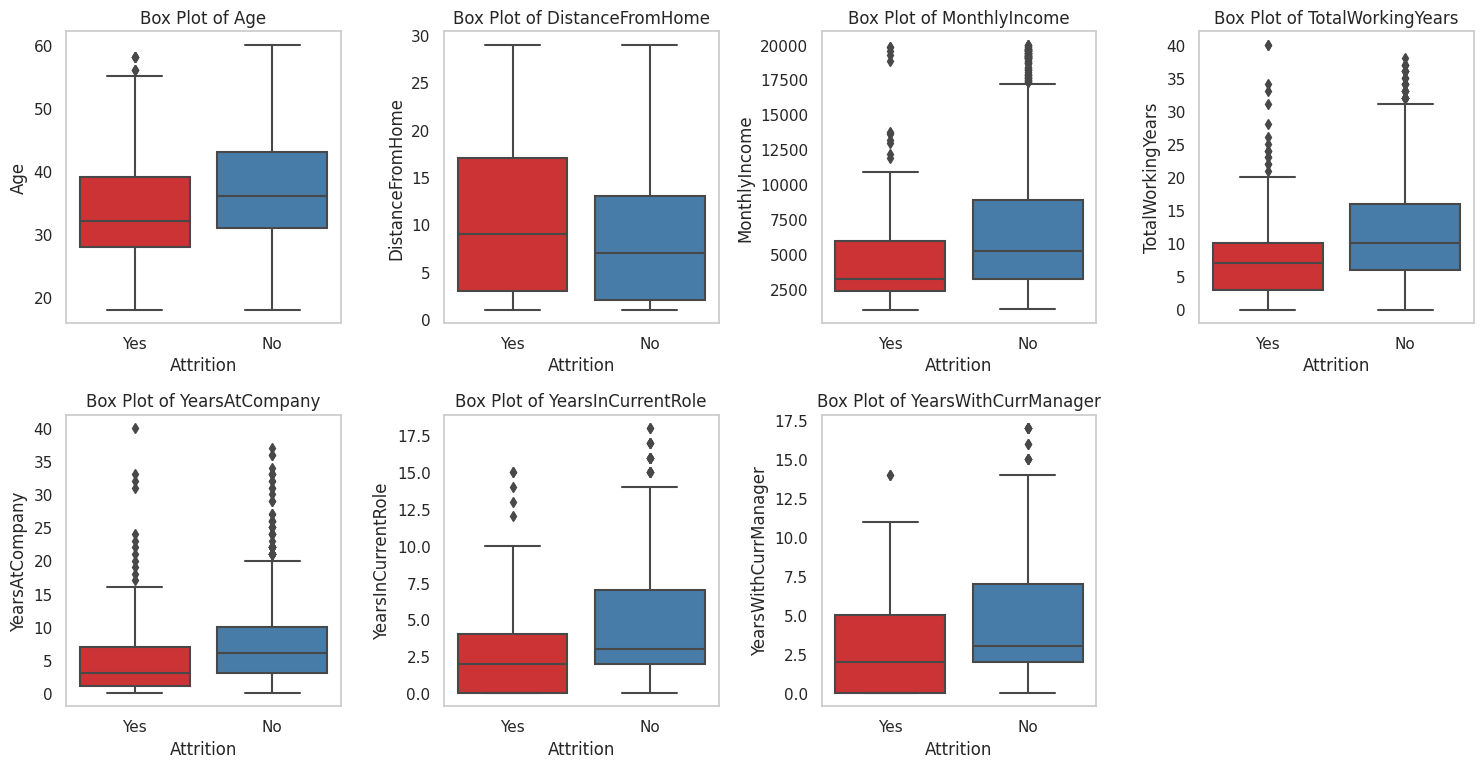

In [17]:
# Create a box plot for numeric variables
numeric_variables = [
    'Age', 'DistanceFromHome', 'MonthlyIncome','TotalWorkingYears', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'
]

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create subplots for box plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy indexing
axes = axes.flatten()

# Create box plots for each variable
for i, var in enumerate(numeric_variables):
    sns.boxplot(x='Attrition', y=var, data=df, ax=axes[i], palette='Set1')
    axes[i].set_title(f'Box Plot of {var}')
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(var)
    axes[i].grid(False)
# Remove any remaining empty subplots
for i in range(len(numeric_variables), len(axes)):
    fig.delaxes(axes[i])

# Show the plots
plt.grid(False)
plt.tight_layout()


plt.show()


## Coorelation Matrix
The heatmap visually illustrates the magnitude and direction of linear relationships between variables. It uses warmer colors like red to indicate positive correlations, cooler colors like blue for negative correlations, and white for no correlation. This graphical representation aids in identifying patterns and dependencies among the variables

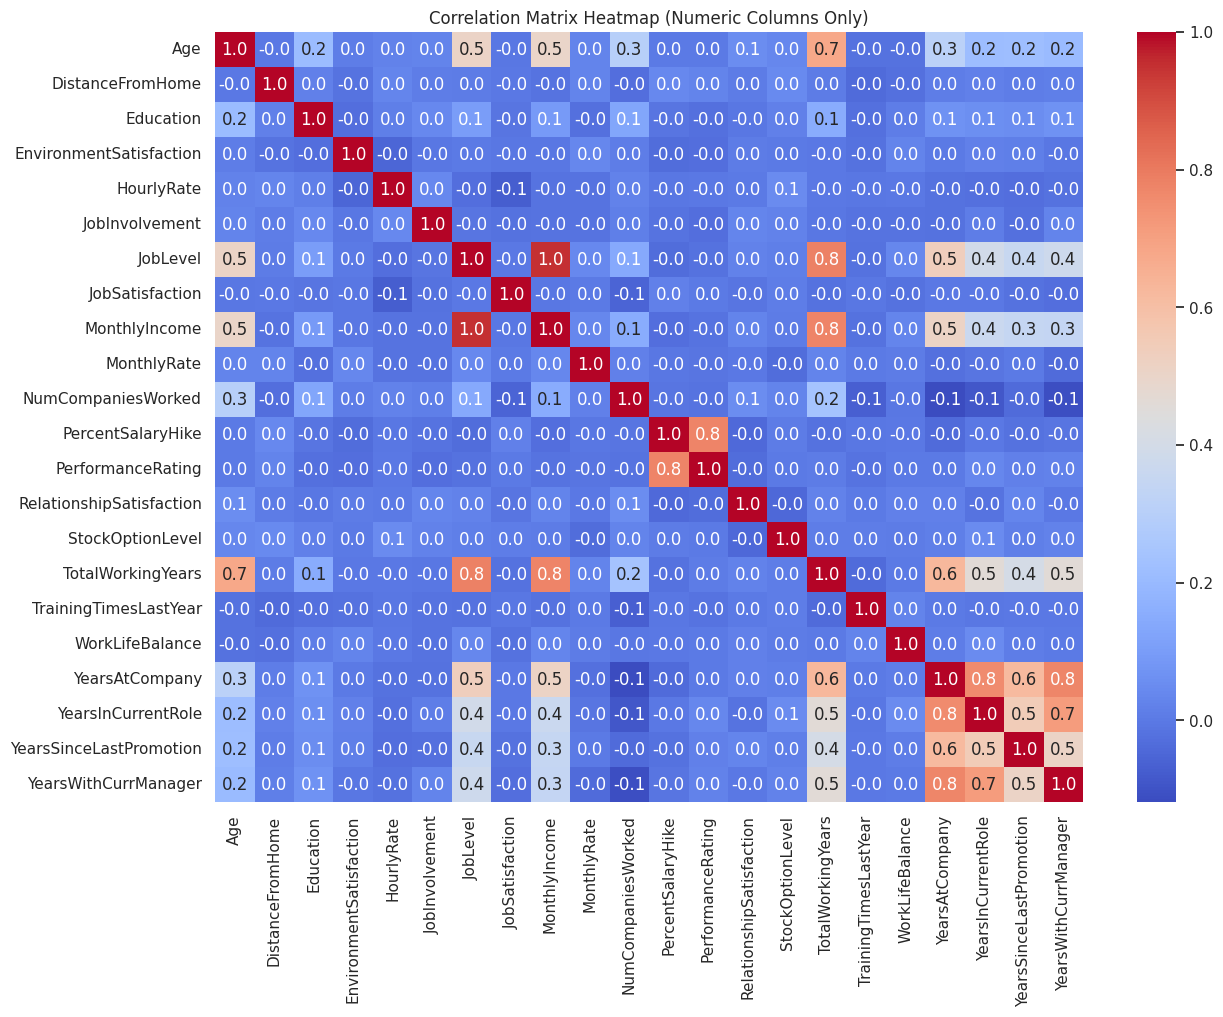

In [18]:
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr(method='pearson')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", xticklabels=True)
plt.title("Correlation Matrix Heatmap (Numeric Columns Only)")
plt.show()

# Recommendations
Based on above findings, below is a list of recommendations to improve rentention and lower attrition

- <b>Focus on Employee Development:</b> Invest in training and development programs to help junior employees in all departments progress in their careers. This can improve job satisfaction and reduce attrition among this group. <br>
<br>
- <b>Review Compensation and Benefits:</b> Assess the salary structure and benefits packages to ensure they are competitive in the market. Consider increasing compensation for employees with lower median incomes to make the organization more attractive <br>
<br>
- <b>Work-Life Balance Initiatives:</b> Implement initiatives that promote work-life balance, especially for employees in roles with longer tenures and those working overtime. This can improve job satisfaction and reduce attrition. <br>
<br>
- <b>Flexible Work Arrangements:</b> Consider offering flexible work arrangements or remote work options to reduce commute times for employees who prefer shorter distances from home to the office. <br>
<br>
- <b>Monitor Overtime:</b> Keep a close eye on employees working overtime, especially in the Sales department. Consider redistributing workloads or providing additional support to reduce burnout and attrition. <br>
<br>
- <b>Employee Engagement:</b> Implement strategies to enhance employee engagement, as engaged employees are less likely to leave the organization. Regular feedback, recognition, and career growth opportunities can contribute to higher job satisfaction.